# Cosmological Power Spectrum Analysis

This notebook demonstrates the analysis of cosmological power spectra using the expanded model definitions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.cosmology_models import define_cosmology_models
from codes.analysis import compute_all_models, compute_power_spectrum, print_statistics
from codes.data import load_observational_data
from codes.viz import plot_power_spectra

%matplotlib inline

## 1. Models: Parameter Variations

We examine three key model types with parameter variations:
1. **ΛCDM** - Baseline model
2. **ΛCDM + Σmν** - Massive neutrinos with two different masses
3. **wCDM** - Dark energy equation of state with two different w0 values

In [2]:
# Define k range for theory
k_theory = np.logspace(-4, np.log10(10), 300)

# Define focused models with parameter variations
from codes.cosmology_models import LCDM, nu_mass, wCDM

focused_models = {
    'ΛCDM': LCDM(),
    'ΛCDM + Σmν=0.06 eV': nu_mass(sum_mnu_eV=0.06, N_species=1),
    'ΛCDM + Σmν=0.10 eV': nu_mass(sum_mnu_eV=0.10, N_species=1),
    'wCDM (w0=-0.9)': wCDM(w0=-0.9),
    'wCDM (w0=-1.1)': wCDM(w0=-1.1),
}

print("Focused models:")
for i, name in enumerate(focused_models.keys(), 1):
    print(f"  {i}. {name}")

# Compute power spectra
print("\nComputing power spectra for focused models...")
focused_results = compute_all_models(k_theory, focused_models)

Focused models:
  1. ΛCDM
  2. ΛCDM + Σmν=0.06 eV
  3. ΛCDM + Σmν=0.10 eV
  4. wCDM (w0=-0.9)
  5. wCDM (w0=-1.1)

Computing power spectra for focused models...
Computing ΛCDM...
Computing ΛCDM + Σmν=0.06 eV...
Computing ΛCDM + Σmν=0.10 eV...
Computing wCDM (w0=-0.9)...
Computing wCDM (w0=-1.1)...


In [3]:
# Load DR14 Lyman-alpha forest data
k_obs, Pk_obs, σPk_obs = load_observational_data('data/DR14_pm3d_19kbins.txt')

Loaded observational data: 19 points
  k range: [2.08e-01, 2.52e+00] h/Mpc


/Users/nesar/Projects/HEP/AmSC_HEP/demo/codes/viz.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


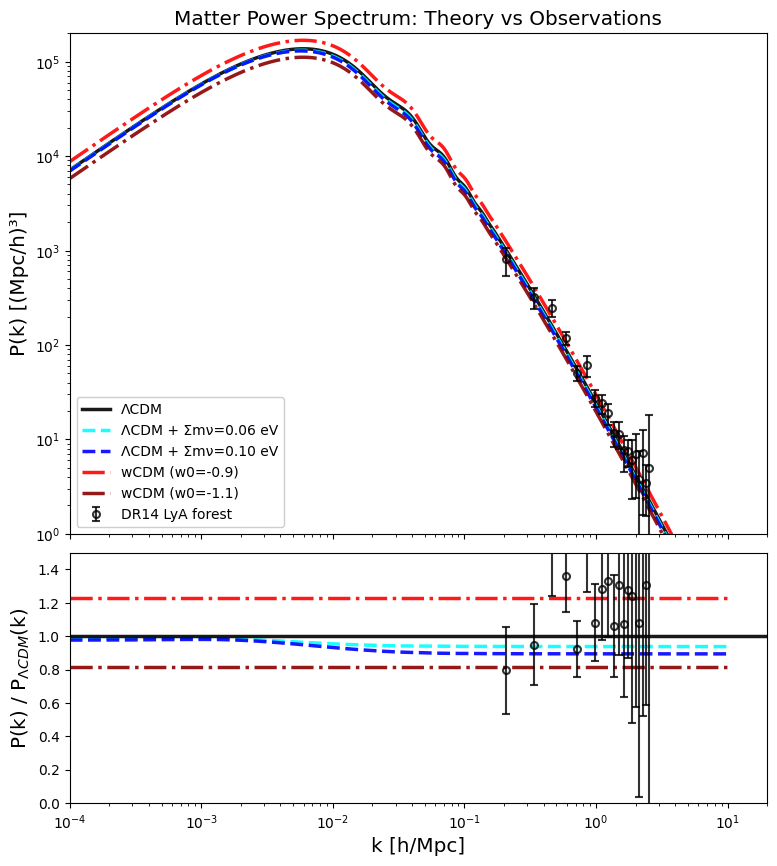

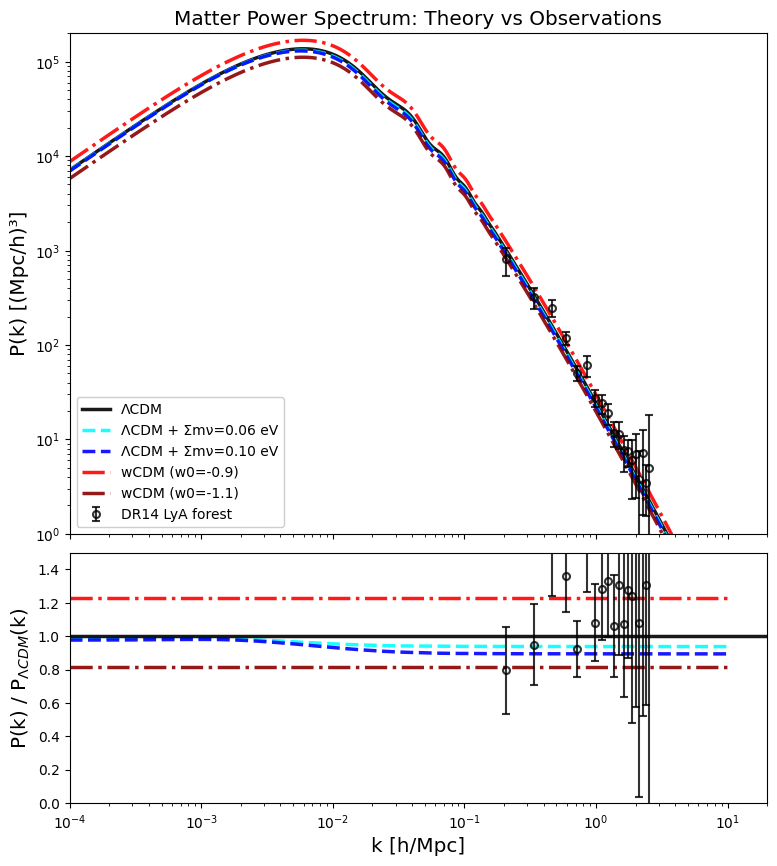

In [4]:
# Plot focused models with observational data
plot_power_spectra(k_theory, focused_results, k_obs, Pk_obs, σPk_obs, save_path=None)

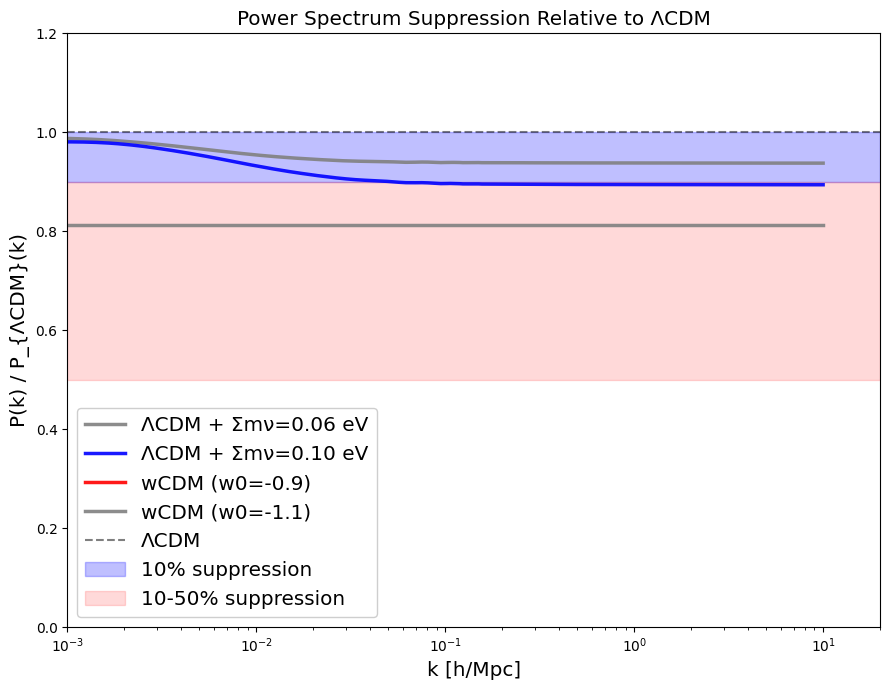

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
# Compute and plot suppression ratios for focused models
from codes.analysis import compute_suppression_ratios
from codes.viz import plot_suppression_ratios

focused_suppression = compute_suppression_ratios(focused_results, k_theory)
plot_suppression_ratios(k_theory, focused_suppression, save_path=None)

---

## 2. Comprehensive Analysis: All Available Cosmology Models
#### Multiple Cosmology models available in CLASS. Not fully verified. 

In [6]:
# Get all cosmology models
models = define_cosmology_models()
print("Available models:")
for i, name in enumerate(models.keys(), 1):
    print(f"  {i}. {name}")

# Compute power spectra
print("\nComputing power spectra...")
model_results = compute_all_models(k_theory, models)

Note: IDM-baryon model requires CLASS with IDM support
Available models:
  1. ΛCDM
  2. ΛCDM + Σmν=0.10 eV
  3. wCDM (w0=-0.9)
  4. Thermal WDM (all DM, m=3 keV)
  5. CWDM (f_wdm=0.2, m=3 keV, g*=100)
  6. ETHOS IDM–DR (fiducial)
  7. IDM–baryon (σ=1e-41 cm², n=-4)

Computing power spectra...
Computing ΛCDM...
Computing ΛCDM + Σmν=0.10 eV...
Computing wCDM (w0=-0.9)...
Computing Thermal WDM (all DM, m=3 keV)...
Computing CWDM (f_wdm=0.2, m=3 keV, g*=100)...
Computing ETHOS IDM–DR (fiducial)...
Computing IDM–baryon (σ=1e-41 cm², n=-4)...


### 2.1 Load Observational Data

In [7]:
# Load DR14 Lyman-alpha forest data
k_obs, Pk_obs, σPk_obs = load_observational_data('data/DR14_pm3d_19kbins.txt')

# Check alignment with ΛCDM
lcdm_params = models['ΛCDM']
Pk_model = compute_power_spectrum(lcdm_params, k_obs)

# Calculate ratio
ratio = Pk_model / Pk_obs
mean_ratio = np.mean(ratio)
median_ratio = np.median(ratio)

print(f"\nΛCDM/Observations ratio:")
print(f"  Mean: {mean_ratio:.3f}")
print(f"  Median: {median_ratio:.3f}")
print(f"\nNote: A ratio ≠ 1 indicates the observational data includes")
print(f"bias factors or is at a different redshift than z=0.")

Loaded observational data: 19 points
  k range: [2.08e-01, 2.52e+00] h/Mpc

ΛCDM/Observations ratio:
  Mean: 0.801
  Median: 0.779

Note: A ratio ≠ 1 indicates the observational data includes
bias factors or is at a different redshift than z=0.


### 2.2 Visualize All Power Spectra

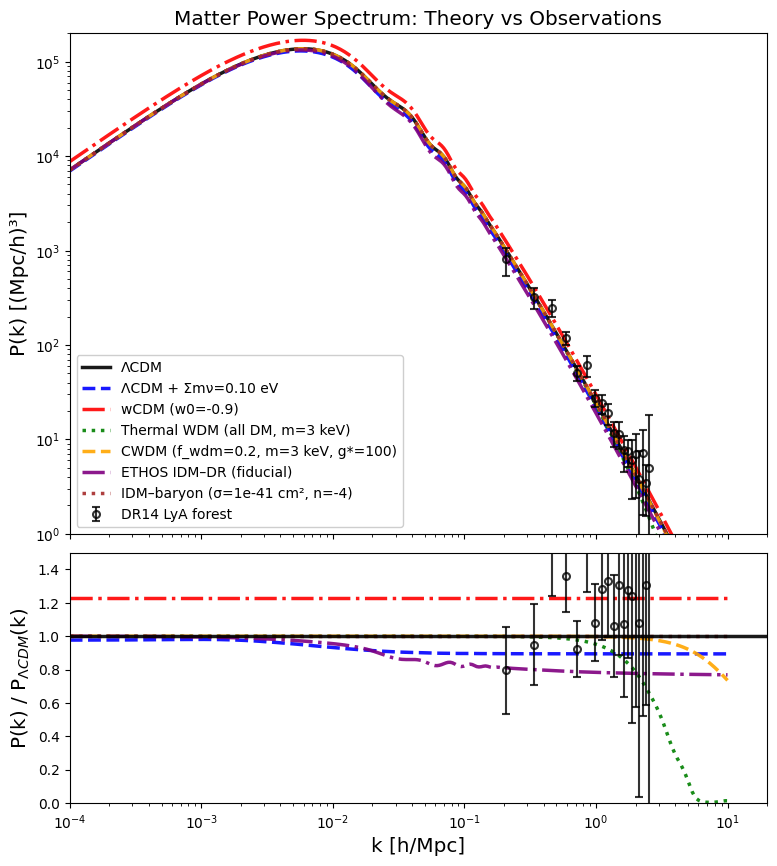

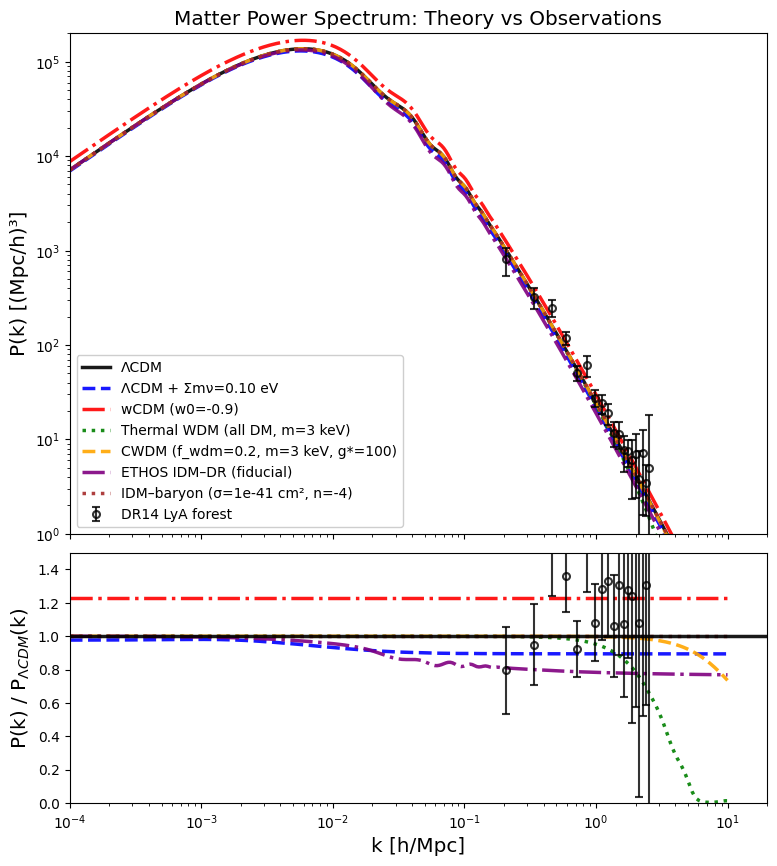

In [8]:
# Plot without any normalization
plot_power_spectra(k_theory, model_results, k_obs, Pk_obs, σPk_obs)

### 2.3 Print Statistics

In [9]:
print_statistics(k_theory, model_results, k_obs, Pk_obs, σPk_obs)


Power Spectrum Statistics

ΛCDM:
  P(k) range: [5.92e-02, 1.37e+05]

ΛCDM + Σmν=0.10 eV:
  P(k) range: [5.30e-02, 1.30e+05]
  Suppression at k=1 h/Mpc: 0.894

wCDM (w0=-0.9):
  P(k) range: [7.28e-02, 1.68e+05]
  Suppression at k=1 h/Mpc: 1.229

Thermal WDM (all DM, m=3 keV):
  P(k) range: [5.76e-04, 1.37e+05]
  Suppression at k=1 h/Mpc: 0.953

CWDM (f_wdm=0.2, m=3 keV, g*=100):
  P(k) range: [4.36e-02, 1.37e+05]
  Suppression at k=1 h/Mpc: 0.998

ETHOS IDM–DR (fiducial):
  P(k) range: [4.55e-02, 1.33e+05]
  Suppression at k=1 h/Mpc: 0.783

IDM–baryon (σ=1e-41 cm², n=-4):
  P(k) range: [5.92e-02, 1.37e+05]
  Suppression at k=1 h/Mpc: 1.000

DR14 LyA forest:
  k range: [2.08e-01, 2.52e+00]
  P(k) range: [3.44e+00, 8.04e+02]
  Mean error: 2.63e+01


### 2.4 Suppression Analysis (All Models)

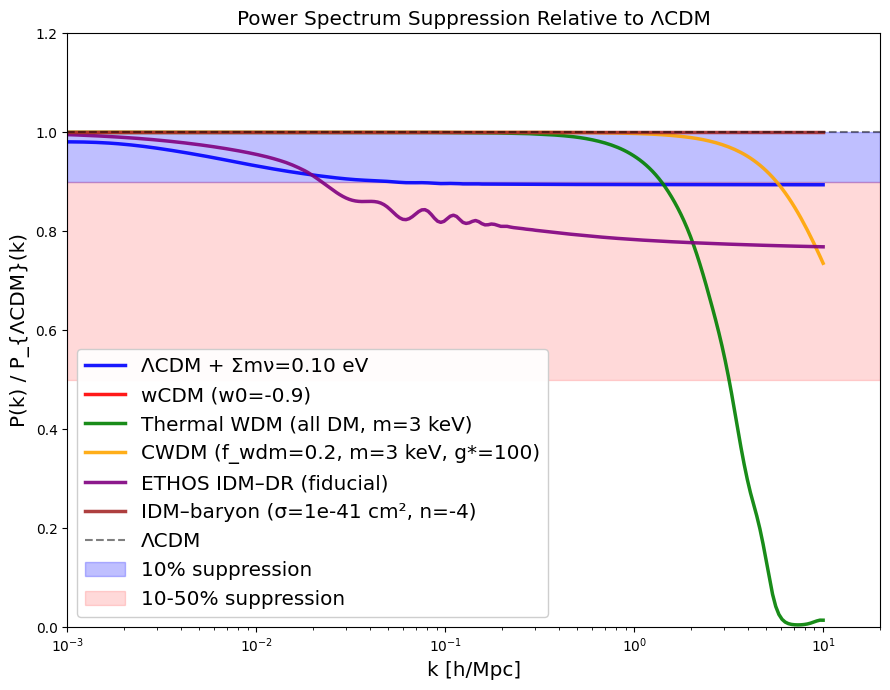

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
from codes.analysis import compute_suppression_ratios
from codes.viz import plot_suppression_ratios

# Compute and plot suppression ratios
suppression = compute_suppression_ratios(model_results, k_theory)
plot_suppression_ratios(k_theory, suppression, save_path=None)